In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## load data

In [2]:
p = "/glade/p/cesm/cseg//inputdata/lnd/clm2/surfdata/surfdata_0.9x1.25_simyr1850_c110921.nc" # CESM 1
# p = "/glade/p/cesm/cseg/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/surfdata_0.9x1.25_hist_78pfts_CMIP6_simyr1850_c190214.nc" # CESM 2
# p = "/glade/work/leizhao/CESM_surface_data/surfdata_0.9x1.25_16pfts_simyr2000_c170428.nc" # LZ CESM 2
# p = "/glade/p/cesm/cseg/inputdata/lnd/clm2/rawdata/mksrf_urban_0.05x0.05_simyr2000.c170724.nc" # 0.05

ds = xr.open_dataset(p)

In [3]:
ds

<xarray.Dataset>
Dimensions:             (lsmlat: 192, lsmlon: 288, lsmpft: 17, nglcec: 10, nlevsoi: 10, nlevurb: 15, numrad: 2, numsolar: 2, time: 12)
Coordinates:
  * time                (time) int32 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: lsmlat, lsmlon, lsmpft, nglcec, nlevsoi, nlevurb, numrad, numsolar
Data variables:
    EDGEN               float64 ...
    EDGEE               float64 ...
    EDGES               float64 ...
    EDGEW               float64 ...
    LATN                (lsmlat, lsmlon) float64 ...
    LONE                (lsmlat, lsmlon) float64 ...
    LATS                (lsmlat, lsmlon) float64 ...
    LONW                (lsmlat, lsmlon) float64 ...
    AREA                (lsmlat, lsmlon) float64 ...
    NUMLON              (lsmlat) int32 ...
    LONGXY              (lsmlat, lsmlon) float64 ...
    LATIXY              (lsmlat, lsmlon) float64 ...
    LANDFRAC_PFT        (lsmlat, lsmlon) float64 ...
    PFTDATA_MASK        (lsmlat, lsmlon) int32 ...
    mxsoil_color        int32 ...
    SOIL_COLOR          (lsmlat, lsmlon) int32 ...
    PCT_SAND            (nlevsoi, lsmlat, lsmlon) float64 ...
    PCT_CLAY            (nlevsoi, lsmlat, lsmlon) float64 ...
    EF1_BTR             (lsmlat, lsmlon) float64 ...
    EF1_FET             (lsmlat, lsmlon) float64 ...
    EF1_FDT             (lsmlat, lsmlon) float64 ...
    EF1_SHR             (lsmlat, lsmlon) float64 ...
    EF1_GRS             (lsmlat, lsmlon) float64 ...
    EF1_CRP             (lsmlat, lsmlon) float64 ...
    ORGANIC             (nlevsoi, lsmlat, lsmlon) float64 ...
    CANYON_HWR          (lsmlat, lsmlon) float64 ...
    EM_IMPROAD          (lsmlat, lsmlon) float64 ...
    EM_PERROAD          (lsmlat, lsmlon) float64 ...
    EM_ROOF             (lsmlat, lsmlon) float64 ...
    EM_WALL             (lsmlat, lsmlon) float64 ...
    HT_ROOF             (lsmlat, lsmlon) float64 ...
    THICK_ROOF          (lsmlat, lsmlon) float64 ...
    THICK_WALL          (lsmlat, lsmlon) float64 ...
    T_BUILDING_MAX      (lsmlat, lsmlon) float64 ...
    T_BUILDING_MIN      (lsmlat, lsmlon) float64 ...
    WIND_HGT_CANYON     (lsmlat, lsmlon) float64 ...
    WTLUNIT_ROOF        (lsmlat, lsmlon) float64 ...
    WTROAD_PERV         (lsmlat, lsmlon) float64 ...
    ALB_IMPROAD         (numsolar, numrad, lsmlat, lsmlon) float64 ...
    ALB_PERROAD         (numsolar, numrad, lsmlat, lsmlon) float64 ...
    ALB_ROOF            (numsolar, numrad, lsmlat, lsmlon) float64 ...
    ALB_WALL            (numsolar, numrad, lsmlat, lsmlon) float64 ...
    TK_ROOF             (nlevurb, lsmlat, lsmlon) float64 ...
    TK_WALL             (nlevurb, lsmlat, lsmlon) float64 ...
    TK_IMPROAD          (nlevurb, lsmlat, lsmlon) float64 ...
    CV_ROOF             (nlevurb, lsmlat, lsmlon) float64 ...
    CV_WALL             (nlevurb, lsmlat, lsmlon) float64 ...
    CV_IMPROAD          (nlevurb, lsmlat, lsmlon) float64 ...
    NLEV_IMPROAD        (lsmlat, lsmlon) int32 ...
    PCT_WETLAND         (lsmlat, lsmlon) float64 ...
    PCT_LAKE            (lsmlat, lsmlon) float64 ...
    PCT_GLACIER         (lsmlat, lsmlon) float64 ...
    PCT_GLC_MEC         (nglcec, lsmlat, lsmlon) float64 ...
    TOPO_GLC_MEC        (nglcec, lsmlat, lsmlon) float64 ...
    THCK_GLC_MEC        (nglcec, lsmlat, lsmlon) float64 ...
    FMAX                (lsmlat, lsmlon) float64 ...
    PCT_URBAN           (lsmlat, lsmlon) float64 ...
    PCT_PFT             (lsmpft, lsmlat, lsmlon) float64 ...
    MONTHLY_LAI         (time, lsmpft, lsmlat, lsmlon) float64 ...
    MONTHLY_SAI         (time, lsmpft, lsmlat, lsmlon) float64 ...
    MONTHLY_HEIGHT_TOP  (time, lsmpft, lsmlat, lsmlon) float64 ...
    MONTHLY_HEIGHT_BOT  (time, lsmpft, lsmlat, lsmlon) float64 ...
Attributes:
    Conventions:                        NCAR-CSM
    History_Log:                        created on: 10-06-09 12:38:50
    Logname:                            erik
    Host:                               be1005en.ucar.ed

In [4]:
var_ls = [
    "CANYON_HWR","EM_IMPROAD","EM_PERROAD","EM_ROOF","EM_WALL",
    "HT_ROOF","THICK_ROOF","THICK_WALL","T_BUILDING_MAX","T_BUILDING_MIN",
    "WTLUNIT_ROOF","WTROAD_PERV","ALB_IMPROAD","ALB_PERROAD","ALB_ROOF","ALB_WALL",
    "TK_ROOF","TK_WALL","TK_IMPROAD","CV_ROOF","CV_WALL","CV_IMPROAD",
    "NLEV_IMPROAD","PCT_URBAN"
]

ds = xr.open_dataset(p)[var_ls]

d = {} # d[('lsmlat','lsmlon')] = ['CANYON_HWR','EM_IMPROAD',...]
for var in ds:
    if ds[var].dims in d:
        d[ds[var].dims].append(var)
    else:
        d[ds[var].dims] = [var]
        
for k in d:
    print(k,len(d[k]))

('lsmlat', 'lsmlon') 14
('numsolar', 'numrad', 'lsmlat', 'lsmlon') 4
('nlevurb', 'lsmlat', 'lsmlon') 6


## check ('lsmlat', 'lsmlon')

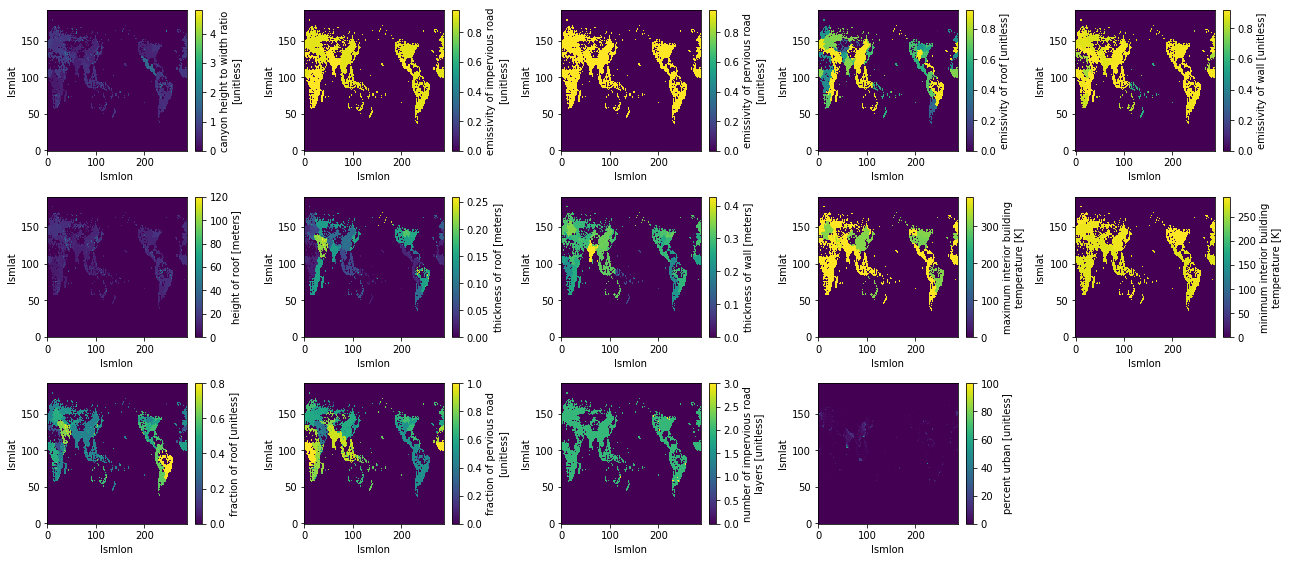

In [5]:
ds_d = {}
for k in d:
    if len(k) == 2:
        idx = 1
        fig = plt.figure(figsize=(18,8))
        for var in ds[d[k]]:
            ax = fig.add_subplot(3,5,idx)
            ds[var].plot(ax=ax)
            idx += 1
        plt.tight_layout()
        plt.show()

## check ('numsolar', 'numrad', 'lsmlat', 'lsmlon') 

In [6]:
ds_tmp = ds[d[('numsolar', 'numrad', 'lsmlat', 'lsmlon')]].to_dataframe()\
.unstack(["numrad","numsolar"]).reset_index()\
.set_index(["lsmlat","lsmlon"]).to_xarray()

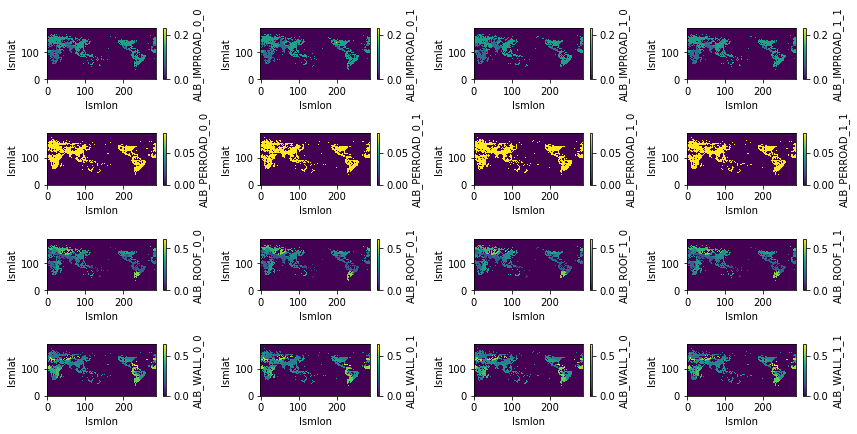

In [7]:
fig = plt.figure(figsize=(12,6))
idx = 1
for var in ds_tmp:
    var_new = '_'.join(str(i) for i in var)
    ax = fig.add_subplot(4,4,idx)
    ds_tmp = ds_tmp.rename({var:var_new})
    ds_tmp[var_new].plot(ax=ax)
    idx+=1
plt.tight_layout()
plt.show()

0_0, 0_1, 1_0, and 1_0 are the same

In [8]:
for var in ds[d[('numsolar', 'numrad', 'lsmlat', 'lsmlon')]]:
    assert(np.array_equal(ds_tmp[var+"_0_0"].values,ds_tmp[var+"_0_1"].values))
    assert(np.array_equal(ds_tmp[var+"_0_0"].values,ds_tmp[var+"_1_0"].values))
    assert(np.array_equal(ds_tmp[var+"_0_0"].values,ds_tmp[var+"_1_1"].values))

check the variance

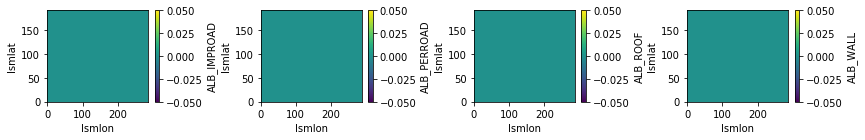

In [9]:
ds_tmp = ds[d[('numsolar', 'numrad', 'lsmlat', 'lsmlon')]]
fig = plt.figure(figsize=(12,2))
idx = 1
for var in ds_tmp:
    ax = fig.add_subplot(1,4,idx)
    ds_tmp[var].var(dim=["numsolar","numrad"]).plot()
    idx+=1
#     print(var,":",ds_tmp[var].mean(dim=["lsmlat","lsmlon"]).var().values)
plt.tight_layout()
plt.show()

### check ('nlevurb', 'lsmlat', 'lsmlon') 

In [10]:
ds_tmp = ds[d[('nlevurb', 'lsmlat', 'lsmlon')]]

TK_ROOF : 0.0
TK_WALL : 3.0814879110195774e-33
TK_IMPROAD : 0.00155493226290293
CV_ROOF : 0.0
CV_WALL : 0.0
CV_IMPROAD : 7268854630.680062


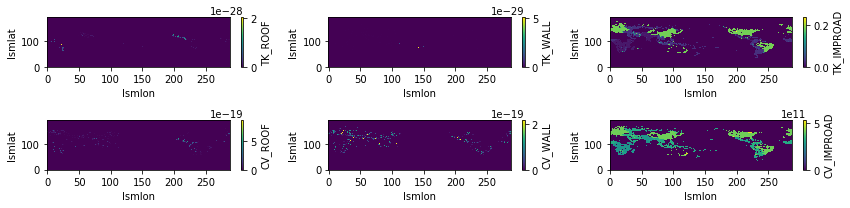

In [11]:
fig = plt.figure(figsize=(12,3))
idx = 1
for var in ds_tmp:
    ax = fig.add_subplot(2,3,idx)
    ds_tmp[var].var(dim="nlevurb").plot()
    idx+=1
    print(var,":",ds_tmp[var].mean(dim=["lsmlat","lsmlon"]).var().values)
plt.tight_layout()
plt.show()

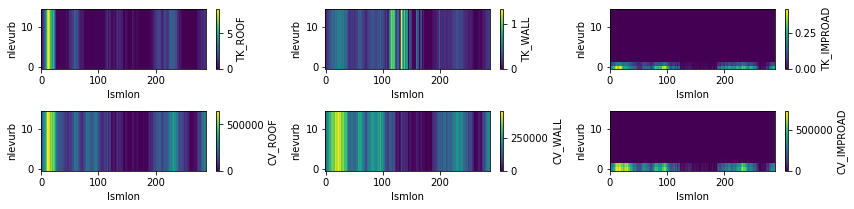

In [12]:
fig = plt.figure(figsize=(12,3))
idx = 1
for var in ds_tmp:
    ax = fig.add_subplot(2,3,idx)
    ds_tmp[var].mean(dim="lsmlat").plot()
    idx+=1
plt.tight_layout()
plt.show()

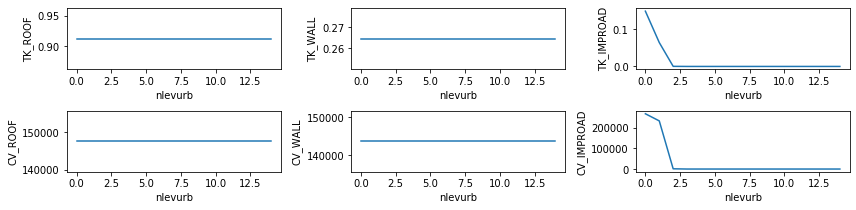

In [13]:
fig = plt.figure(figsize=(12,3))
idx = 1
for var in ds_tmp:
    ax = fig.add_subplot(2,3,idx)
    ds_tmp[var].mean(dim=["lsmlat","lsmlon"]).plot()
    idx+=1
plt.tight_layout()
plt.show()

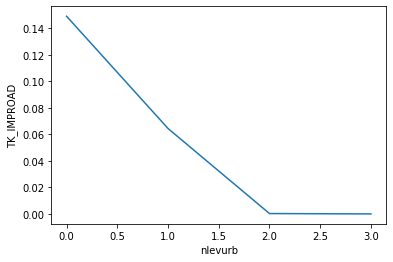

In [14]:
ds["TK_IMPROAD"].sel(nlevurb=[0,1,2,3]).mean(dim=["lsmlat","lsmlon"]).plot()

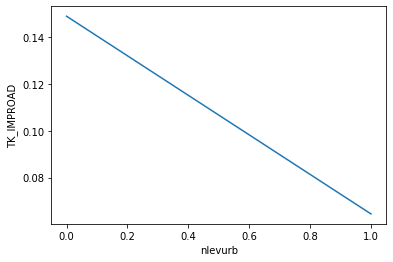

In [15]:
ds["TK_IMPROAD"].sel(nlevurb=[0,1]).mean(dim=["lsmlat","lsmlon"]).plot()